In [2]:
import pandas as pd
import numpy as np
import requests

In [3]:
%pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup


In [5]:
pip show beautifulsoup4


Name: beautifulsoup4
Version: 4.12.2
Summary: Screen-scraping library
Home-page: 
Author: 
Author-email: Leonard Richardson <leonardr@segfault.org>
License: 
Location: C:\Users\SharanKusuma\anaconda3\Lib\site-packages
Requires: soupsieve
Required-by: conda-build, nbconvert
Note: you may need to restart the kernel to use updated packages.


In [6]:
try:
    from bs4 import BeautifulSoup
    print("BeautifulSoup imported successfully!")
except ImportError:
    print("BeautifulSoup is not installed or cannot be imported.")


BeautifulSoup imported successfully!


In [7]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip show html5lib


Name: html5lib
Version: 1.1
Summary: HTML parser based on the WHATWG HTML specification
Home-page: https://github.com/html5lib/html5lib-python
Author: 
Author-email: 
License: MIT License
Location: C:\Users\SharanKusuma\anaconda3\Lib\site-packages
Requires: six, webencodings
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
try:
    import html5lib
    print("html5lib is installed.")
except ImportError:
    print("html5lib is not installed.")


html5lib is installed.


In [10]:
reviews = []
stars = []
date = []
country = []

for i in range(1, 39):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
        
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    for item in soup.find_all("time"):
        date.append(item.text)
        
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 32
Error on page 34
Error on page 34
Error on page 36
Error on page 36


In [28]:
reviews = []
stars = []
date = []
country = []


for i in range(1, 39):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 32
Error on page 34
Error on page 34
Error on page 36
Error on page 36


In [29]:
len(reviews)

3755

In [30]:
len(country)

3755

In [31]:
stars = stars[:3755]

In [32]:
date = date[:3755]

In [33]:
df = pd.DataFrame()
df["reviews"] = reviews
df["stars"] = stars
df["country"] = country
df["date"] = date
df

,reviews,stars,country,date
0,✅ Trip Verified | Communication and customer s...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,United Kingdom,29th February 2024
1,✅ Trip Verified | That was supposed to be my ...,2,United Kingdom,23rd February 2024
2,✅ Trip Verified | Have no fear when your BA f...,1,United Kingdom,21st February 2024
3,Not Verified | We have flown BA five times fr...,10,United States,17th February 2024
4,✅ Trip Verified | London Heathrow to Istanbul...,3,United Kingdom,17th February 2024
...,...,...,...,...
3750,Flight from Heathrow to Toronto. Booked emerge...,9,United Kingdom,29th August 2012
3751,LHR to HAM. Purser addresses all club passenge...,8,United Kingdom,28th August 2012
3752,My son who had worked for British Airways urge...,2,United Kingdom,12th October 2011
3753,London City-New York JFK via Shannon on A318 b...,7,United States,11th October 2011


In [34]:
df.shape

(3755, 4)

In [35]:
df.head()

,reviews,stars,country,date
0,✅ Trip Verified | Communication and customer s...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,United Kingdom,29th February 2024
1,✅ Trip Verified | That was supposed to be my ...,2,United Kingdom,23rd February 2024
2,✅ Trip Verified | Have no fear when your BA f...,1,United Kingdom,21st February 2024
3,Not Verified | We have flown BA five times fr...,10,United States,17th February 2024
4,✅ Trip Verified | London Heathrow to Istanbul...,3,United Kingdom,17th February 2024


In [36]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "BA_reviews.csv")

In [37]:
#Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re

In [38]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"BA_reviews.csv", index_col=0)

In [39]:
df.head()

,reviews,stars,country,date
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,29th February 2024
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,23rd February 2024
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,21st February 2024
3,Not Verified | We have flown BA five times fr...,10.0,United States,17th February 2024
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,17th February 2024


In [40]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [41]:
df['verified']

0        True
1        True
2        True
3       False
4        True
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Name: verified, Length: 3755, dtype: bool

In [42]:
df.head()

,reviews,stars,country,date,verified
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,29th February 2024,True
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,23rd February 2024,True
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,21st February 2024,True
3,Not Verified | We have flown BA five times fr...,10.0,United States,17th February 2024,False
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,17th February 2024,True


In [43]:
%pip install nlt


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nlt (from versions: none)
ERROR: No matching distribution found for nlt


In [44]:
%import nltk
nltk.download('stopwords')


UsageError: Line magic function `%import` not found.


In [ ]:
%pip install nltk


In [45]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [46]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SharanKusuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [48]:
import nltk


In [134]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus = []

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]','',rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [50]:
import nltk


In [51]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SharanKusuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [167]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus = []

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = "  ".join(rev)
    corpus.append(rev)

In [168]:
df['corpus'] = corpus

In [169]:
df.head()

,reviews,stars,country,date,corpus
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,2024-02-29,communication customer service non existen...
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,2024-02-23,hat supposed flight cancelled hour takeof...
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,2024-02-21,fear ba flight operated finnair business ...
3,Not Verified | We have flown BA five times fr...,10.0,United States,2024-02-17,verified flown ba five time western usa ...
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,2024-02-17,london heathrow istanbul start half term ...


In [55]:
df.dtypes

reviews      object
stars       float64
country      object
date         object
verified       bool
corpus       object
dtype: object

In [56]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [57]:
df.date.head()

0   2024-02-29
1   2024-02-23
2   2024-02-21
3   2024-02-17
4   2024-02-17
Name: date, dtype: datetime64[ns]

In [58]:
df.stars.unique()

array([ 5.,  2.,  1., 10.,  3.,  8.,  6.,  9.,  4.,  7., nan])

In [59]:
df.stars.value_counts()

stars
1.0     879
2.0     429
3.0     411
8.0     368
10.0    325
7.0     313
9.0     309
5.0     272
4.0     250
6.0     194
Name: count, dtype: int64

In [60]:
df.drop(df[df.stars == "nan"].index, axis=0, inplace=True)

In [61]:
df.stars.unique()

array([ 5.,  2.,  1., 10.,  3.,  8.,  6.,  9.,  4.,  7., nan])

In [62]:
df.dropna(subset=['stars'], inplace=True)

In [63]:
df.stars.unique()

array([ 5.,  2.,  1., 10.,  3.,  8.,  6.,  9.,  4.,  7.])

In [64]:
#check null values

df.isnull().value_counts()

reviews  stars  country  date   verified  corpus
False    False  False    False  False     False     3748
                True     False  False     False        2
Name: count, dtype: int64

In [65]:
df.country.isnull().value_counts()

country
False    3748
True        2
Name: count, dtype: int64

In [66]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [67]:
df.shape

(3748, 6)

In [72]:
df.reset_index(drop=True)

,reviews,stars,country,date,verified,corpus
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,2024-02-29,True,communication customer service non existent ma...
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,2024-02-23,True,hat supposed flight cancelled hour takeoff nea...
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,2024-02-21,True,fear ba flight operated finnair business class...
3,Not Verified | We have flown BA five times fr...,10.0,United States,2024-02-17,False,verified flown ba five time western usa englan...
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,2024-02-17,True,london heathrow istanbul start half term schoo...
...,...,...,...,...,...,...
3743,Flight from Heathrow to Toronto. Booked emerge...,9.0,United Kingdom,2012-08-29,False,flight heathrow toronto booked emergency exit ...
3744,LHR to HAM. Purser addresses all club passenge...,8.0,United Kingdom,2012-08-28,False,lhr ham purser address club passenger name boa...
3745,My son who had worked for British Airways urge...,2.0,United Kingdom,2011-10-12,False,son worked british airway urged fly british ai...
3746,London City-New York JFK via Shannon on A318 b...,7.0,United States,2011-10-11,False,london city new york jfk via shannon really ni...


In [ ]:
import os

In [80]:
import os
current_directory = os.getcwd()
print(current_directory)


C:\Users\SharanKusuma\BA project


In [81]:
df.head()

,reviews,stars,country,date,verified,corpus
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,2024-02-29,True,communication customer service non existent ma...
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,2024-02-23,True,hat supposed flight cancelled hour takeoff nea...
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,2024-02-21,True,fear ba flight operated finnair business class...
3,Not Verified | We have flown BA five times fr...,10.0,United States,2024-02-17,False,verified flown ba five time western usa englan...
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,2024-02-17,True,london heathrow istanbul start half term schoo...


In [85]:
import wordcloud

In [86]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [87]:
cwd=os.getcwd()
df = pd.read_csv(cwd+"BA_reviews.csv", index_col=0)
df = df.reset_index(drop=True)

In [88]:
df.head()

,reviews,stars,country,date
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,29th February 2024
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,23rd February 2024
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,21st February 2024
3,Not Verified | We have flown BA five times fr...,10.0,United States,17th February 2024
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,17th February 2024


In [94]:
df.stars.mean()

4.709333333333333

Text(0.5, 0.98, 'Counts for each ratings')

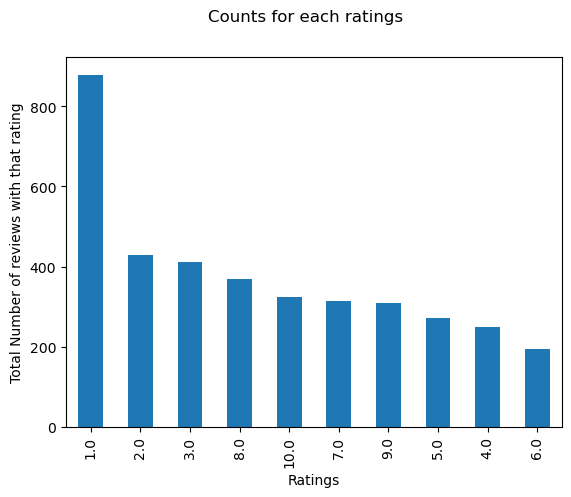

In [95]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [100]:
df_ratings = pd.DataFrame(df.stars)


In [101]:
df_ratings.columns

Index(['stars'], dtype='object')

In [104]:
import pandas as pd

# Assuming df contains the 'stars' column
# First, calculate the value counts of the 'stars' column
star_counts = df['stars'].value_counts()

# Create a DataFrame using the value counts
df_ratings = pd.DataFrame({'stars': star_counts.index, 'counts': star_counts.values})

# Print the DataFrame
print(df_ratings)


   stars  counts
0    1.0     879
1    2.0     429
2    3.0     411
3    8.0     368
4   10.0     325
5    7.0     313
6    9.0     309
7    5.0     272
8    4.0     250
9    6.0     194


In [105]:
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [106]:
print(df_ratings)

   stars  counts  pct_values
0    1.0     879        1.82
1    2.0     429        3.64
2    3.0     411        5.45
3    8.0     368       14.55
4   10.0     325       18.18
5    7.0     313       12.73
6    9.0     309       16.36
7    5.0     272        9.09
8    4.0     250        7.27
9    6.0     194       10.91


Text(0.5, 1.0, 'Counts for each ratings')

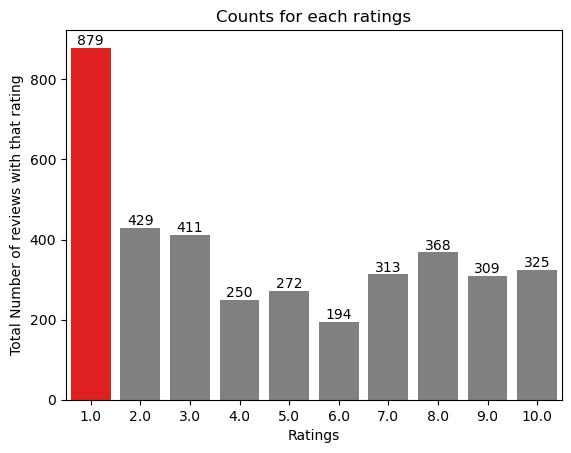

In [110]:
clrs = ['Red' if (x ==  max(df_ratings.counts)) else 'grey' for x in df_ratings.counts ]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [111]:
#from how many countries did we receive reviews?
print(f"{len(df.country.unique())} unique countries")

73 unique countries


In [112]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [118]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [119]:
df_country_review.columns

Index(['total_reviews', 'count'], dtype='object')

Text(0.5, 1.0, 'Maximum number of review by country')

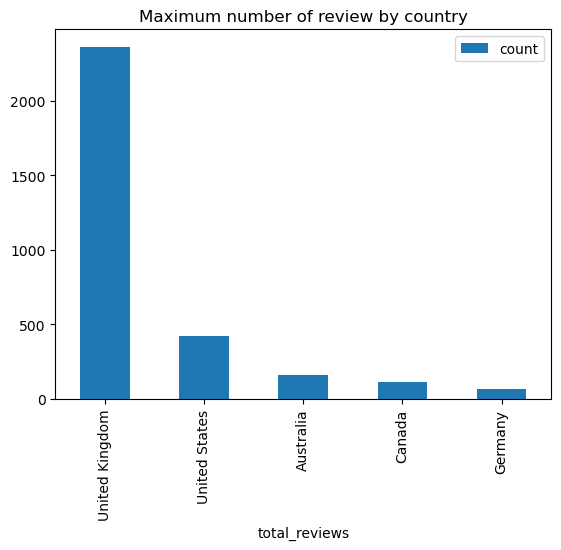

In [120]:
df_country_review.plot(kind="bar", x='total_reviews')
plt.title("Maximum number of review by country")

In [126]:
# Convert 'stars' column to numeric, coerce errors to NaN for non-numeric values
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows with NaN values in the 'stars' column
df.dropna(subset=['stars'], inplace=True)

# Now, group by 'country' and calculate the mean of 'stars'
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()


In [127]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

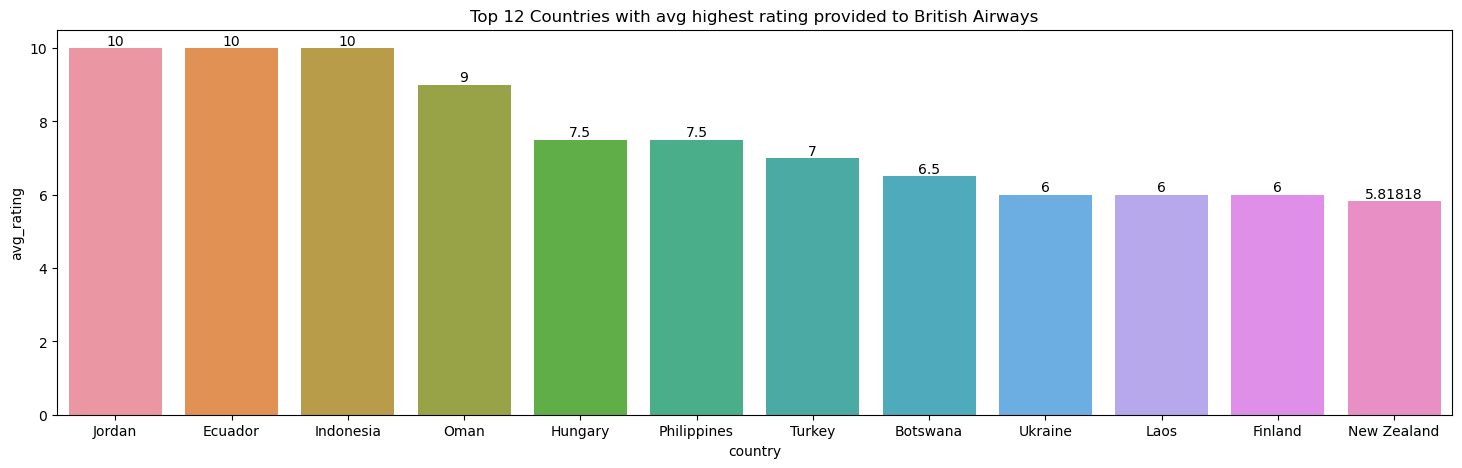

In [128]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [131]:
#time series Analysis
df['date'] = pd.to_datetime(df['date'], format='mixed')


In [1]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

NameError: name 'px' is not defined

In [140]:
df.head()

,reviews,stars,country,date,corpus
0,✅ Trip Verified | Communication and customer s...,5.0,United Kingdom,2024-02-29,communicationandcustomerservicenonexistentthey...
1,✅ Trip Verified | That was supposed to be my ...,2.0,United Kingdom,2024-02-23,hatwassupposedtobemyflightbutitwascancelledhou...
2,✅ Trip Verified | Have no fear when your BA f...,1.0,United Kingdom,2024-02-21,havenofearwhenyourbaflightisoperatedbyfinnairt...
3,Not Verified | We have flown BA five times fr...,10.0,United States,2024-02-17,notverifiedwehaveflownbafivetimesfromwesternus...
4,✅ Trip Verified | London Heathrow to Istanbul...,3.0,United Kingdom,2024-02-17,londonheathrowtoistanbulatthestartofthehalfter...


In [155]:
from nltk.corpus import stopwords


In [156]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [157]:
from nltk.corpus import stopwords

# Access the set of English stopwords
english_stopwords = set(stopwords.words('english'))


In [170]:
wordcloud = WordCloud(height=600,width=600,max_font_size=10, max_words=50, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SharanKusuma\AppData\Local\Temp\ipykernel_6936\449439669.py", line 1, in <module>
    wordcloud = WordCloud(height=600,width=600,max_font_size=10, max_words=50, stopwords=stopwords).generate(reviews)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 642, in generate
    """Check if ``layout_`` was computed, otherwise raise error."""
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 623, in generate_from_text
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 596, in process_text
    else:
          
T

In [159]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SharanKusuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
df.corpus

0       communication  customer  service  non  existen...
1       hat  supposed  flight  cancelled  hour  takeof...
2       fear  ba  flight  operated  finnair  business ...
3       verified  flown  ba  five  time  western  usa ...
4       london  heathrow  istanbul  start  half  term ...
                              ...                        
3750    flight  heathrow  toronto  booked  emergency  ...
3751    lhr  ham  purser  address  club  passenger  na...
3752    son  worked  british  airway  urged  fly  brit...
3753    london  city  new  york  jfk  via  shannon  re...
3754    sin  lhr  ba  b  first  class  old  aircraft  ...
Name: corpus, Length: 3750, dtype: object

In [172]:
wordcloud = WordCloud(height=600,width=600,max_font_size=10, max_words=50, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SharanKusuma\AppData\Local\Temp\ipykernel_6936\3069420609.py", line 1, in <module>
    wordcloud = WordCloud(height=600,width=600,max_font_size=10, max_words=50, stopwords=stopwords).generate(reviews)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 642, in generate
    """Check if ``layout_`` was computed, otherwise raise error."""
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 623, in generate_from_text
  File "C:\Users\SharanKusuma\anaconda3\Lib\site-packages\wordcloud\wordcloud.py", line 596, in process_text
    else:
          


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SharanKusuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


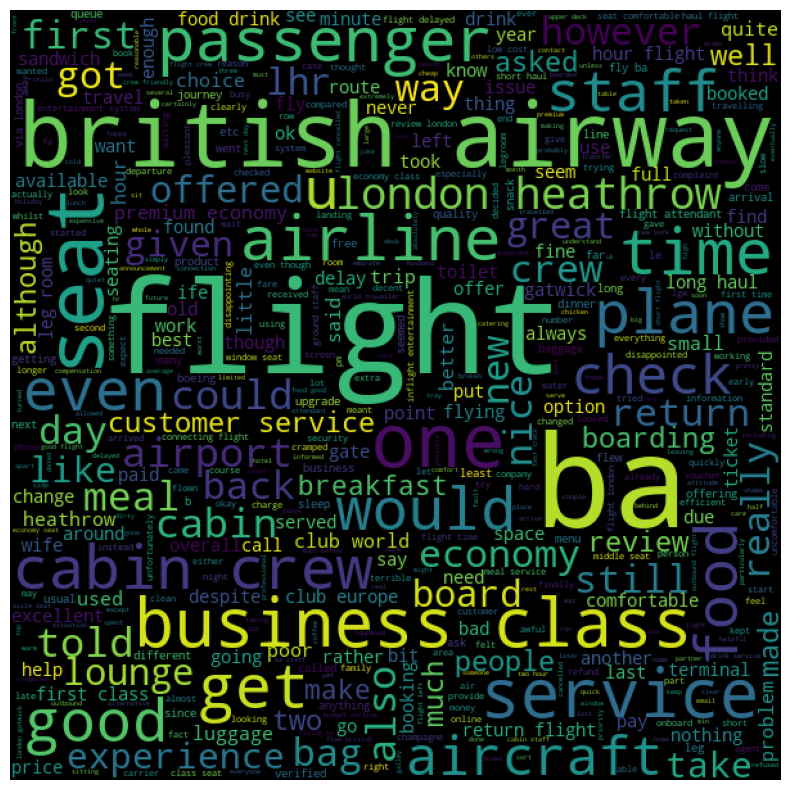

In [174]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Start with one review:
reviews = "  ".join(df.corpus)

# Generate stopwords set
stopwords_set = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords_set).generate(reviews)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


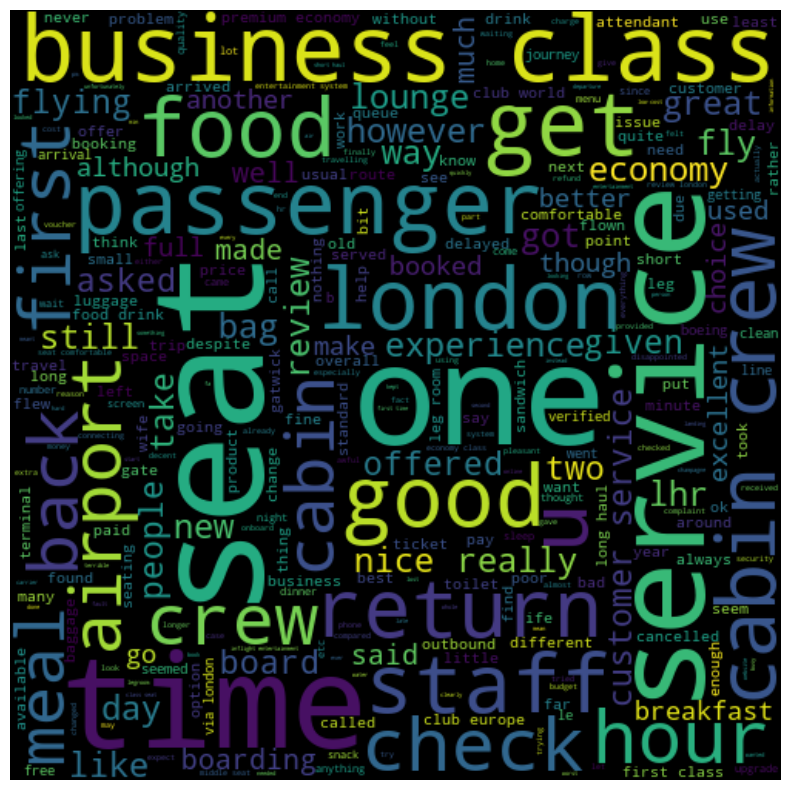

In [175]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# word frequency

In [189]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define the text of all reviews
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

new_words = [word for word in words if word not in stopwords]

# Find the frequency distribution of the remaining words
nlp_words = FreqDist(new_words).most_common(20)

# Create a DataFrame of these words and their frequencies
all_fdist = pd.Series(dict(nlp_words))


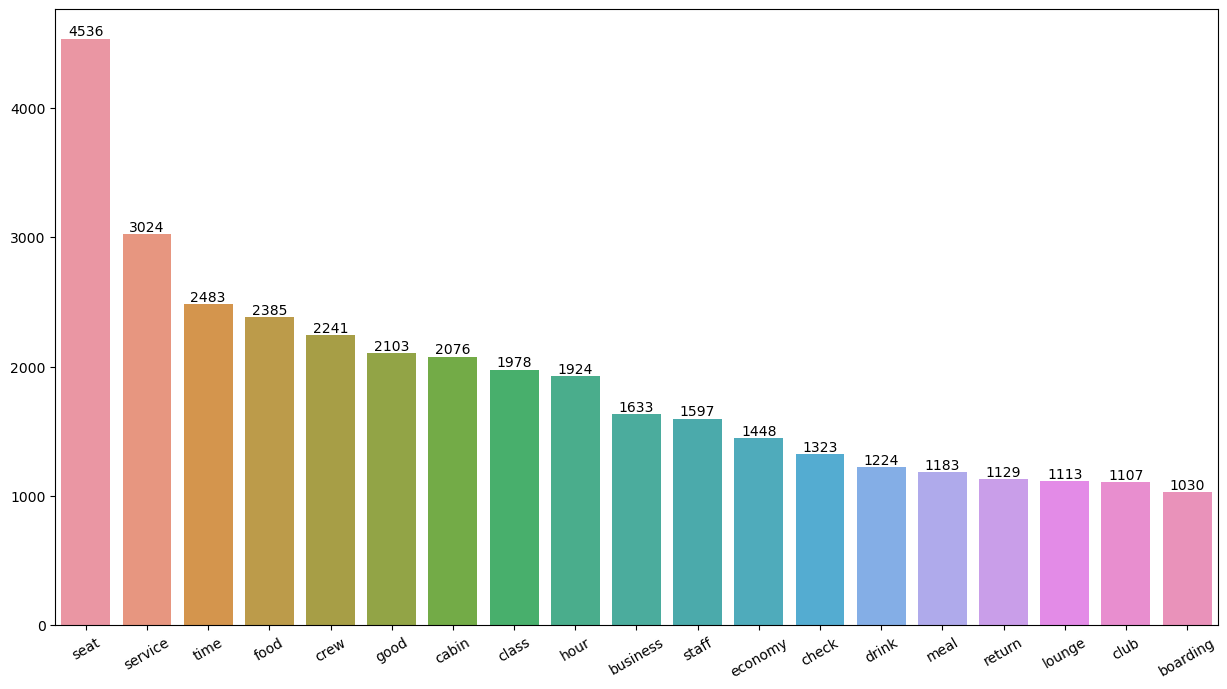

In [197]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index[1:], y=all_fdist.values[1:], ax=ax)
all_plot.bar_label(all_plot.containers[0])
ax.set_xticklabels(all_fdist.index[1:], rotation=30)  # Set the x-axis tick labels starting from index 1
plt.show()



# word frequency with n gram

<Axes: >

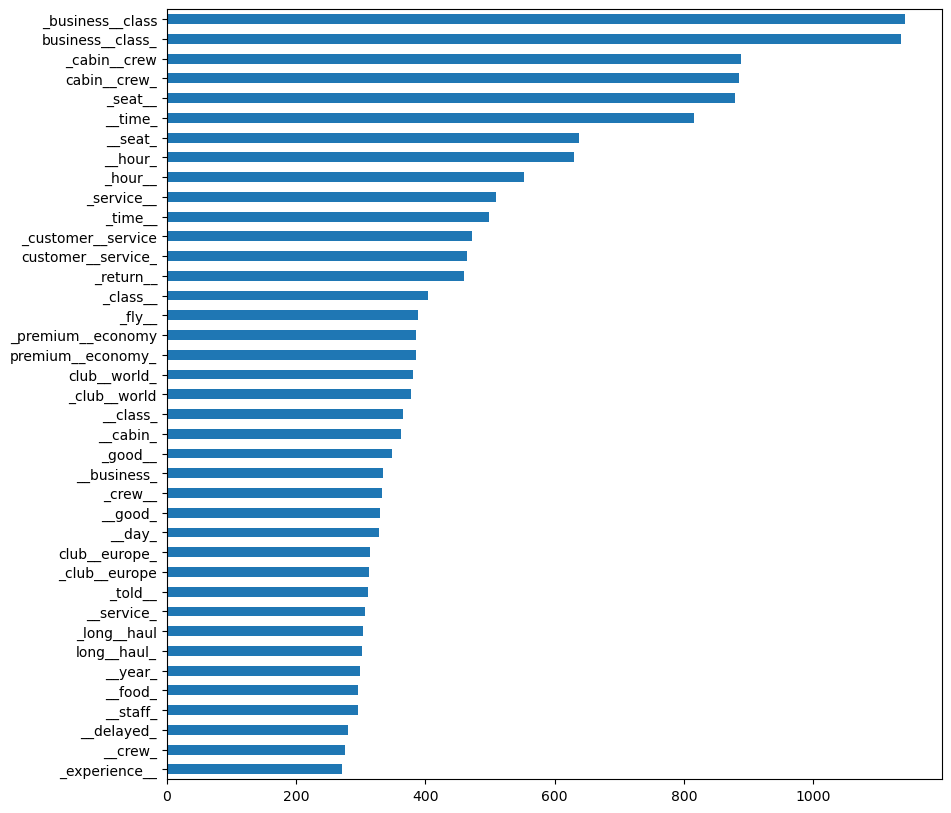

In [203]:
def get_freq_dist(new_words, number_of_ngrams):
    # Generate n-grams
    n_grams = ngrams(new_words, number_of_ngrams)

    # Create FreqDist
    ngram_fd = FreqDist(n_grams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    
    # Drop the last row
    ngram_freqdist = ngram_freqdist.iloc[:-1]
    
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax

get_freq_dist(new_words, 4)


In [204]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]


<Axes: >

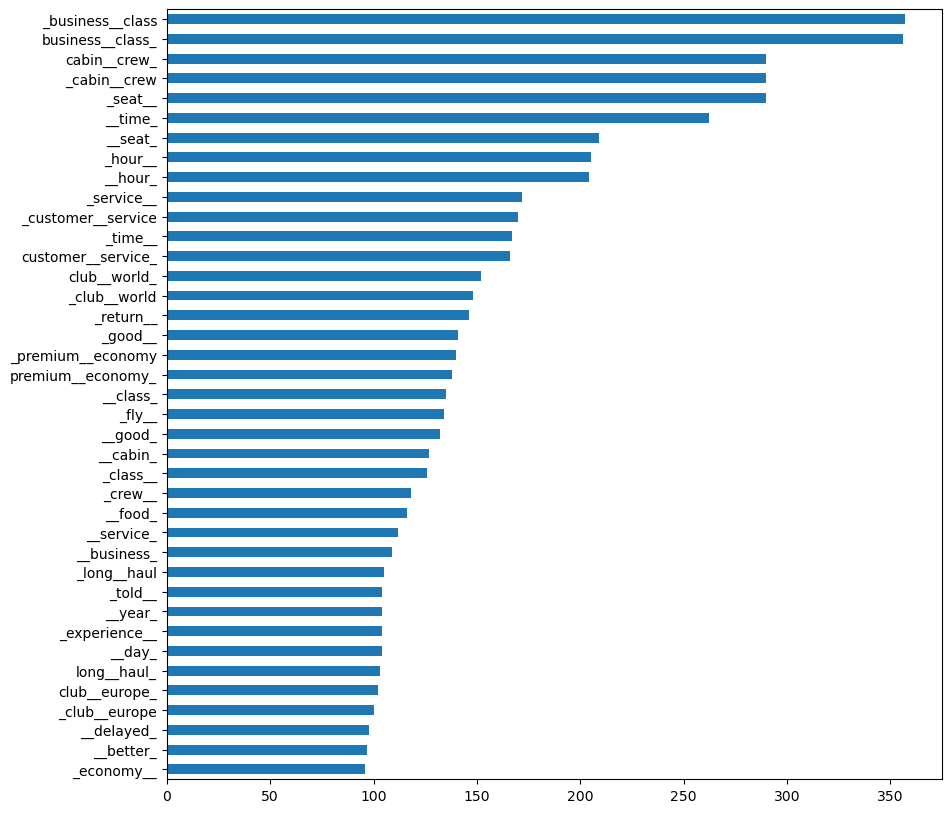

In [205]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)


<Axes: >

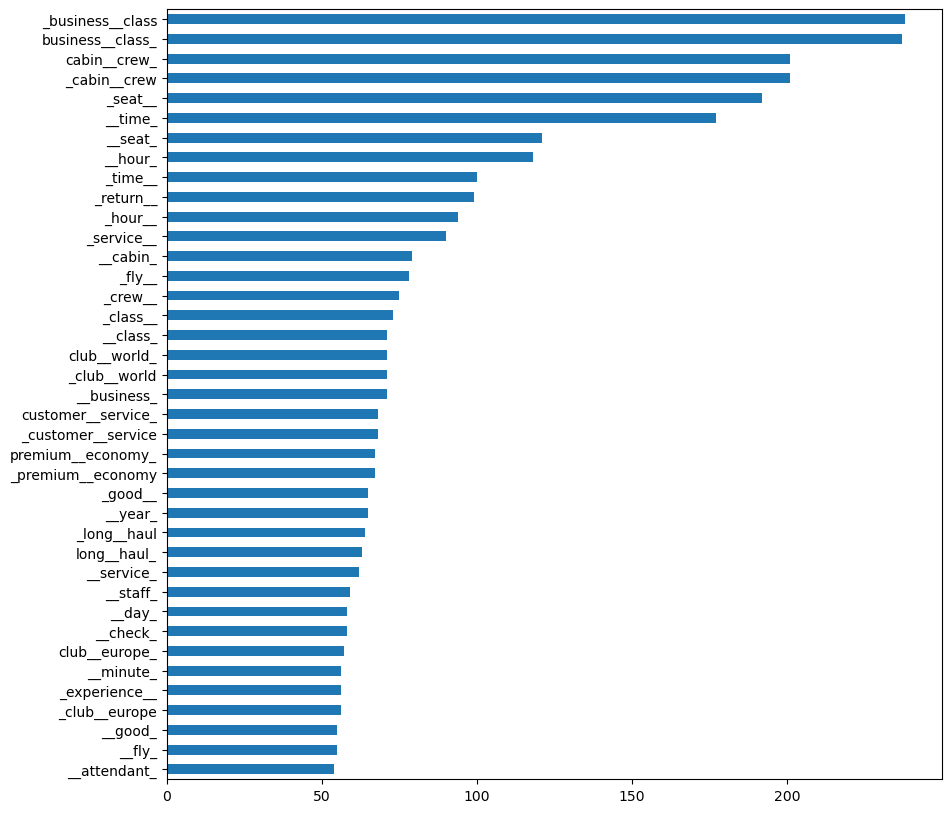

In [206]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

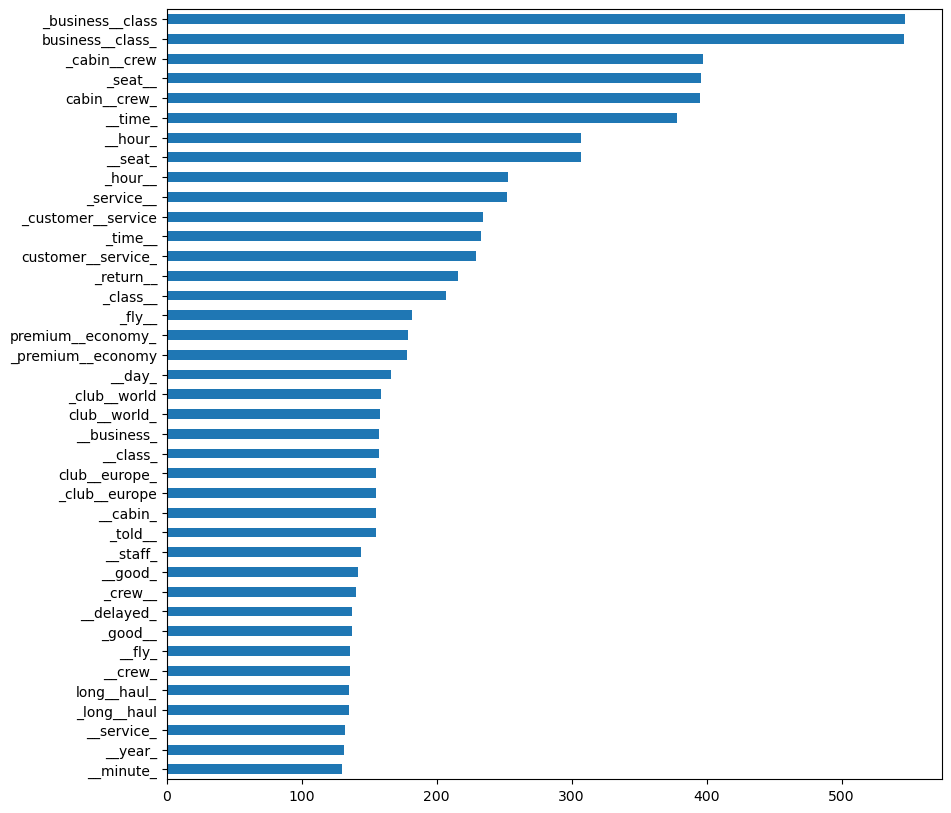

In [207]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent



In [209]:
%pip install TextBlob

  Obtaining dependency information for TextBlob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ------------------------ --------------- 389.1/626.3 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [211]:
from textblob import TextBlob

# Assuming 'corpus' is the column containing the text in your DataFrame
# Calculate polarity and subjectivity using TextBlob
df['polarity'] = df['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['corpus'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [212]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2536 number of reviews between -0.2 and 0.2 polarity score
1468 number of reviews between -0.1 and 0.1 polarity score


# Topic Modelling with NMF

In [219]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [220]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.02016505, 0.11932135],
       [0.04252651, 0.01644098],
       [0.03970815, 0.07680712],
       ...,
       [0.09882239, 0.15673681],
       [0.01925057, 0.03796952],
       [0.        , 0.14050925]])

In [221]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,36.8,seat,16.1
1,ba,12.5,ba,9.1
2,hour,8.5,class,7.2
3,time,7.0,food,5.7
4,london,6.4,business,5.7
5,airway,6.2,service,5.5
6,british,6.1,cabin,5.3
7,service,6.0,good,5.1
8,would,5.2,crew,4.9
9,airline,4.5,economy,4.3
